# Libraries to install 

cv2 -- pip install opencv 
matplotlib.pyplot -- pip install matplotlib
numpy -- pip install numpy 


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


Uploading  an image 

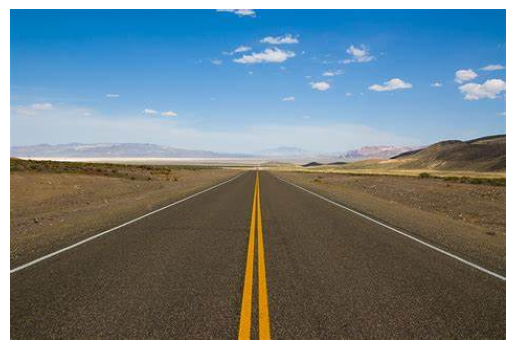

In [ ]:
image_path = r'day1_images\1.jpeg'  #Make sure to put an r if you have error
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



Applying the canny filter

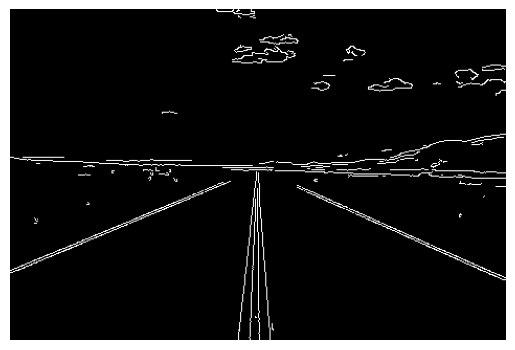

In [ ]:
image_path = r'day1_images\1.jpeg'  
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image_gray, 180, 300)  # Apply the canny filter  with threshold lower  180 to 300 on upper 

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

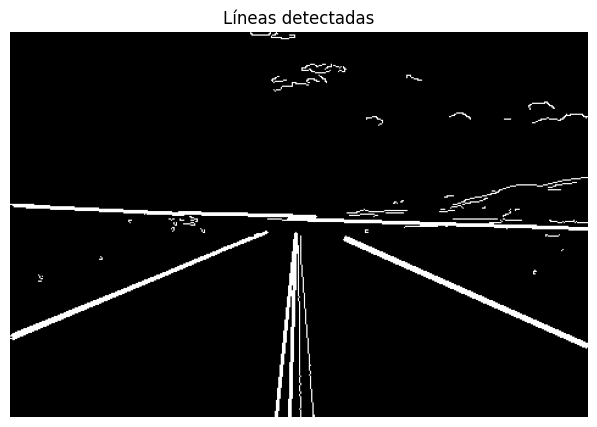

In [ ]:

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 180, 300) #It is binary 


#Detect the lines by using HoughLines 
lines = cv2.HoughLinesP(edges, 1, # 1 the resolution of 1 pxl,
                        np.pi / 180,# angle resolution of pi/180, 
                          threshold=100, # minimum acumulator of 100, 
                          minLineLength=50,# min lenght to be accepted as a line 
                            maxLineGap=30)#maximum gap between line to treat them as a single line

#Draw the lines detected
output = edges.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2) #Print the lines 

# Show the result 
plt.figure(figsize=(10, 5))
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.title('Detected lines')
plt.show()


Opening the camera

In [ ]:
cap = cv2.VideoCapture(0) # Capture the photograms, 0 is the number of the camera 

while True :
    ret, frame = cap.read() # Read the frame and size 
    if not ret: # If there is nothing the code finish 
        break
    
    # cv2.imshow create a window
    cv2.imshow("Cheese", frame)  # Name of the window is "cheese", and will be adding frame to that window 

    if cv2.waitKey(1) & 0xFF == ord('q'): #If you want to finish press q (you can change the keyboard you want)
        break

    #The whole loop get updated per photogram 

cap.release() # Finish to capturing 
cv2.destroyAllWindows() # Close the window 


Now with the *canny* processing 

t_lower : If a pixel’s gradient is below this value, it’s rejected outright. 

t_upper : Pixels with gradients above this value are definitely considered edges.

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 
    edges = cv2.Canny(gray, 50, 150)  # Apply the canny filter  with threshold lower  50 to 150 on upper 


    #Detect the lines by using HoughLines 
    lines = cv2.HoughLinesP(edges, 1, # 1 the resolution of 1 pxl,
                            np.pi / 180,# angle resolution of pi/180, 
                            threshold=100, # minimum acumulator of 100, 
                            minLineLength=50,# min lenght to be accepted as a line 
                                maxLineGap=30)#maximum gap between line to treat them as a single line

    #Draw the lines detected
    output = frame.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2) #Print the lines 

    # Mostrar resultado
    cv2.imshow("Canny", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



: 

# Challenge
Based on the previously observed, codified a code that detect circles !

In [ ]:

gray = cv2.medianBlur(gray, 5)

"""circles = cv2.HoughCircles(
    gray, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=20,
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)
"""
"""

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

"""

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 
    gray = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(
    gray, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=80,
    param1=50, 
    param2=50, 
    minRadius=50, 
    maxRadius=150
    )

    output = gray.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    # Mostrar resultado
    cv2.imshow("Canny", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

